In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('../datasets/wholesale_customers/Wholesale_customers_data.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = ['Fresh', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
cat_features = ['Channel', 'Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
    ]
)

X_scaled = preprocessor.fit_transform(df)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape


(440, 5)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans.fit_predict(X_pca)


In [6]:
clusters_original = KMeans(
    n_clusters=3, random_state=42, n_init=10
).fit_predict(X_scaled)


In [7]:
from sklearn.metrics import silhouette_score

score_original = silhouette_score(X_scaled, clusters_original)
score_pca = silhouette_score(X_pca, clusters_pca)

print("Original:", score_original)
print("PCA:", score_pca)


Original: 0.3933074168549742
PCA: 0.412626446138386


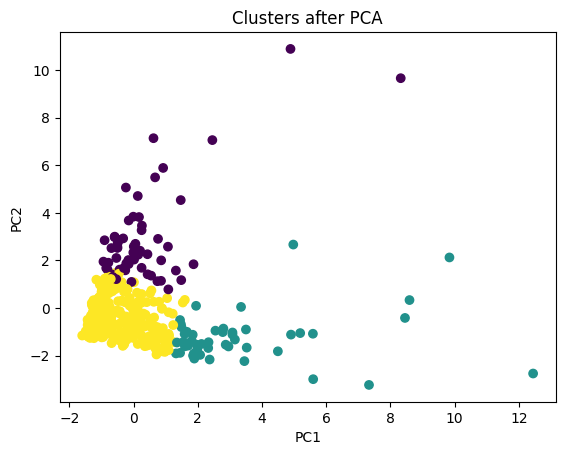

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters after PCA")
plt.show()
